In [5]:
import numpy as np
import matplotlib





In [6]:
P1 = np.array([0.0,0.0]) # origin 

# cylinder 
theta = np.linspace(0,2*np.pi, 100)
r = 0.025
cylinder = np.concatenate((r*np.cos(theta), r*np.sin(theta))).reshape(2,-1).T
print(cylinder.shape)

# box 
P2 = np.array([-0.25,0.1])
P3 = np.array([0.65,0.1])
P4 = np.array([0.65,-0.1])
P5 = np.array([-0.25,-0.1])

# box1 = np.concatenate((np.linspace(P2[0], P3[0], 270+1), np.full((271),P2[1]))).reshape(2,-1)
# box2 = np.concatenate((np.full((31),P3[0]),np.linspace(P3[1], P4[1], 30+1))).reshape(2,-1)
# box3 = np.concatenate((np.linspace(P4[0], P5[0], 270+1), np.full((271),P4[1]))).reshape(2,-1)
# box4 = np.concatenate((np.full((31),P5[0]),np.linspace(P5[1], P2[1], 30+1))).reshape(2,-1)

# box = np.hstack((box1[:,:-1], box2[:,:-1], box3[:,:-1], box4[:,:-1])) # 

box = np.concatenate((P2,P3,P4,P5)).reshape(-1,2)

print(box.shape)
print(cylinder)

(100, 2)
(4, 2)
[[ 2.50000000e-02  0.00000000e+00]
 [ 2.49496669e-02  1.58559799e-03]
 [ 2.47988703e-02  3.16481134e-03]
 [ 2.45482174e-02  4.73128111e-03]
 [ 2.41987175e-02  6.27869968e-03]
 [ 2.37517779e-02  7.80083614e-03]
 [ 2.32091983e-02  9.29156139e-03]
 [ 2.25731635e-02  1.07448728e-02]
 [ 2.18462344e-02  1.21549184e-02]
 [ 2.10313383e-02  1.35160204e-02]
 [ 2.01317564e-02  1.48226982e-02]
 [ 1.91511111e-02  1.60696902e-02]
 [ 1.80933510e-02  1.72519753e-02]
 [ 1.69627353e-02  1.83647927e-02]
 [ 1.57638167e-02  1.94036616e-02]
 [ 1.45014227e-02  2.03643988e-02]
 [ 1.31806367e-02  2.12431357e-02]
 [ 1.18067769e-02  2.20363341e-02]
 [ 1.03853753e-02  2.27407999e-02]
 [ 8.92215554e-03  2.33536965e-02]
 [ 7.42300938e-03  2.38725560e-02]
 [ 5.89397339e-03  2.42952892e-02]
 [ 4.34120444e-03  2.46201938e-02]
 [ 2.77095500e-03  2.48459616e-02]
 [ 1.18954790e-03  2.49716835e-02]
 [-3.96649096e-04  2.49968532e-02]
 [-1.98124892e-03  2.49213694e-02]
 [-3.55787096e-03  2.47455360e-02]
 [-5

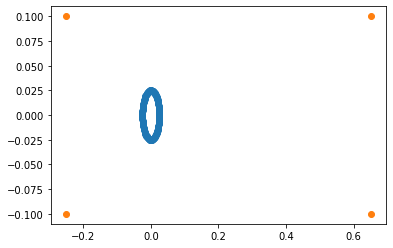

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
i = 600
plt.scatter(cylinder[:,0], cylinder[:,1], color = 'C0')
plt.scatter(box[:i,0], box[:i,1],color = 'C1')

In [6]:
def vtktosu2(sum1, file_name= 'mesh',output_dir= './', scale=1, flip=False):
 
    # Store the number of nodes and open the output mesh file
    Npts = sum1[-1][2] # total number of points 
    Nelem  = sum1[0][2] # total number of elements
    Nbound = len(sum1)-2 # total number of boundaries
    Mesh_File = open(os.path.join(output_dir, file_name+'.su2'),"w")

    # Write the dimension of the problem and the number of interior elements
    Mesh_File.write( "%\n" )
    Mesh_File.write( "% Problem dimension\n" )
    Mesh_File.write( "%\n" )
    Mesh_File.write( "NDIME= 2\n" )
    Mesh_File.write( "%\n" )
    Mesh_File.write( "% Inner element connectivity\n" )
    Mesh_File.write( "%\n" )
    Mesh_File.write( "NELEM= %s\n" % (Nelem))
    # Write the element connectivity
    for i in range(Nelem):
        if flip ==True: 
            Mesh_File.write( "%s \t %s \t %s \t %s \t %s\n" % (sum1[0][0], sum1[0][3][i,0],sum1[0][3][i,2],sum1[0][3][i,1], i) )
        else: 
            Mesh_File.write( "%s \t %s \t %s \t %s \t %s\n" % (sum1[0][0], sum1[0][3][i,0],sum1[0][3][i,1],sum1[0][3][i,2], i) )
    # Write the points
    Mesh_File.write( "%\n" )
    Mesh_File.write( "% Node coordinates\n" )
    Mesh_File.write( "%\n" )
    Mesh_File.write( "NPOIN= %s\n" % (Npts) )
    for i in range(Npts):
        Mesh_File.write( "%15.14f \t %15.14f \t %s\n" % (sum1[-1][3][i,0]*scale, sum1[-1][3][i,1]*scale, i) )

    # Write the header information for the boundary markers
    Mesh_File.write( "%\n" )
    Mesh_File.write( "% Boundary elements\n" )
    Mesh_File.write( "%\n" )
    Mesh_File.write( "NMARK= %d\n" % (Nbound) )


    # Write the boundary information for each marker
    for i in range(Nbound):
        Mesh_File.write( "MARKER_TAG= %s\n" %(sum1[i+1][-2]))
        Mesh_File.write( "MARKER_ELEMS= %s\n" % (sum1[i+1][2]))
        for j in range(sum1[i+1][2]):
            Mesh_File.write( "%s \t %s \t %s\n" % (sum1[i+1][0], sum1[i+1][3][j,0], sum1[i+1][3][j,1]) )

    # Close the mesh file and exit
    Mesh_File.close()

def vtktofoam( mesh1,meshs1,output_dir, patch_name =None, patch_type =None, scale=1):
    file_header = """/*--------------------------------*- C++ -*----------------------------------*\\
| =========                 |                                                 |
| \\\\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\\\    /   O peration     | Version:  5.x                                   |
|   \\\\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\\\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
"""

    top_separator = """
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //\n\n
"""

    bottom_separator = """
\n// ************************************************************************* //
"""

    def write_FoamFile(ver, fmt, cls, loc, obj,note=None):
        if note !=None:
            B="""
FoamFile
{
    version     %.1f;
    format      %s;
    class       %s;
    note        %s;
    location    %s;
    object      %s;
}""" % (ver, fmt, cls,note, loc, obj)
            return B
        else:         
            A="""
FoamFile
{
    version     %.1f;
    format      %s;
    class       %s;
    location    %s;
    object      %s;
}""" % (ver, fmt, cls, loc, obj)
            return A
            
    def get_midpoint(cell):
        num_pts = cell.GetNumberOfPoints()
        pts = cell.GetPoints()
        midpoint = np.array([0.0,0.0,0.0])
        for i in range(num_pts):
            midpoint += pts.GetPoint(i)
        midpoint /= num_pts
        return midpoint

    #need a polydata object to store bd conditions
    boundary_mid_points = vtk.vtkPoints()
    boundary_id_array = vtk.vtkIntArray()
    nsc = meshs1.GetNumberOfCells()
    for i in range(nsc):
        cell = meshs1.GetCell(i)
        midpoint = get_midpoint(cell)
        boundary_mid_points.InsertNextPoint(midpoint)
        boundary_id_array.InsertNextValue(meshs1.GetCellData().GetArray(0).GetValue(i))

    #this locater helps find the closets point to one point
    loc = vtk.vtkKdTreePointLocator()
    boundary_dataset = vtk.vtkPolyData()
    boundary_dataset.SetPoints(boundary_mid_points)
    loc.SetDataSet(boundary_dataset)
    loc.BuildLocator()

    
    num_boundaries = meshs1.GetCellData().GetArray(0).GetValue(nsc-1) #only the bouday faces!!!
    # this is the boundary faces categorized by openfoam
    boundary_faces = []
    for i in range(num_boundaries):
        boundary_faces.append([])

    internal_faces = []

    #necessary for finding neighbours
    mesh1.BuildLinks()
    nc = mesh1.GetNumberOfCells()

    for cell_id in range(nc): 
        cell = mesh1.GetCell(cell_id)
        nf = cell.GetNumberOfFaces()
        cell_internal_faces = {}
        for face_id in range(nf):
            face = cell.GetFace(face_id)
            neighbour_cell_ids = vtk.vtkIdList()
            # face_point_ids = face.GetPointIds()
            mesh1.GetCellNeighbors(cell_id,face.GetPointIds(),neighbour_cell_ids)
            nn = neighbour_cell_ids.GetNumberOfIds()
            # this mean we found a boundary face!
            if nn == 0:
                face_midpoint = get_midpoint(face)
                boundary_id=boundary_id_array.GetValue(loc.FindClosestPoint(face_midpoint))
                boundary_faces[boundary_id-1].append((
                    [face.GetPointId(p) for p in range(face.GetNumberOfPoints())],cell_id
                ))  # boundary_id-1 means the label is 6 but the index in boundary face list is 6-1 .....
            # this means we found a internal face!
            elif nn == 1:
                # internal
                neighbour_cell_id = neighbour_cell_ids.GetId(0)
                if cell_id < neighbour_cell_id:
                    # here i thk i should use cell_id is key of this dict, but he uses neighbour_cell_id
                    # print(neighbour_cell_id)
                    cell_internal_faces[neighbour_cell_id] = (
                        [face.GetPointId(p) for p in range(face.GetNumberOfPoints())],
                        cell_id,
                        neighbour_cell_id)
            else:
                print ("ERROR: face associated with more than 2 cells")
                exit(1)
        
        ids = list(cell_internal_faces.keys())
        # print(ids)
        ids.sort() # this sort is sorting the internal faces attached to current cell with id as cell_id
        for f in ids:
            internal_faces.append(cell_internal_faces[f])
    #take a look at patch name input
    if patch_name ==None:
        print('No patch names specified, writing with integers'.format(num_boundaries))
        patch_name=[str(ele) for ele in np.arange(num_boundaries)]
        patch_type=['patch']*num_boundaries
        
    if len(patch_name) != num_boundaries:
        print('patch numbers not match boudnary numbers ({}) found, writing with integers'.format(num_boundaries))
        patch_name=[str(ele) for ele in np.arange(num_boundaries)]
        patch_type=['patch']*num_boundaries

    # print("Mesh Summary:")
    # print("Found "+str(len(internal_faces))+' internal faces within the interior')
    # for i in range(num_boundaries):
        # print("Found "+str(len(boundary_faces[i]))+' faces within the '+patch_name[i][0])
    # print("Found "+str(nc)+' volume cells within the interior')

    

    path = os.path.join(output_dir, "polyMesh")
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)
    
    # print('Writing polymesh')

    # write files
    # write points
    points_file = open(os.path.join(path, "points"), "w")
    points_file.write(file_header)
    points_file.write(write_FoamFile(2.0, "ascii", "vectorField","\"constant/polyMesh\"", "points"))
    points_file.write(top_separator)
    num_pts = mesh1.GetNumberOfPoints()
    pts = mesh1.GetPoints()
    points_file.write("%d\n(\n" % num_pts)
    for i in range(num_pts):
        temp_pt = np.array(pts.GetPoint(i))*scale
        points_file.write("(%f %f %f)\n" % tuple(temp_pt))
    points_file.write(")\n")
    points_file.write(bottom_separator)
    points_file.close()

    # write points
    def write_face(face_points):
        return "%d(%s)\n" % (len(face_points), " ".join([str(p) for p in face_points]))

    faces_file = open(os.path.join(path, "faces"), "w")
    faces_file.write(file_header)
    faces_file.write(write_FoamFile(2.0, "ascii", "faceList","\"constant/polyMesh\"", "faces"))
    faces_file.write(top_separator)
    total_faces = len(internal_faces)
    for i in range(num_boundaries):
        total_faces += len(boundary_faces[i])
    faces_file.write("%d\n(\n" % total_faces)
    for i in range(len(internal_faces)):
        faces_file.write(write_face(internal_faces[i][0]))
    for b in boundary_faces: 
        for j in range(len(b)):
            faces_file.write(write_face(b[j][0]))
    faces_file.write(")\n")
    faces_file.write(bottom_separator)
    faces_file.close()

    note = "\"nPoints:{}  nCells:{}  nFaces:{}  nInternalFaces:{}\"".format(num_pts,nc,total_faces,len(internal_faces))
    neighbour_file = open(os.path.join(path, "neighbour"), "w")
    neighbour_file.write(file_header)
    neighbour_file.write(write_FoamFile(2.0, "ascii", "labelList","\"constant/polyMesh\"", "neighbour",note))
    neighbour_file.write(top_separator)
    neighbour_file.write("%d\n(\n" % len(internal_faces))
    for i in range(len(internal_faces)):
        neighbour_file.write("%d\n" % internal_faces[i][2])
    neighbour_file.write(")\n")
    neighbour_file.write(bottom_separator)
    neighbour_file.close()

    owner_file = open(os.path.join(path, "owner"), "w")
    owner_file.write(file_header)
    owner_file.write(write_FoamFile(2.0, "ascii", "labelList","\"constant/polyMesh\"", "owner",note))
    owner_file.write(top_separator)
    owner_file.write("%d\n(\n" % total_faces)
    for i in range(len(internal_faces)):
        owner_file.write("%d\n" % internal_faces[i][1])
    for b in boundary_faces: 
        for j in range(len(b)):
            owner_file.write("%d\n" % b[j][1])
    owner_file.write(")\n")
    owner_file.write(bottom_separator)
    owner_file.close()

    boundary_file = open(os.path.join(path, "boundary"), "w")
    boundary_file.write(file_header)
    boundary_file.write(write_FoamFile(2.0, "ascii", "polyBoundaryMesh","\"constant/polyMesh\"", "boundary"))
    boundary_file.write(top_separator)
    start_face = len(internal_faces)
    boundary_file.write("%d\n(\n" % num_boundaries)
    for i in range(num_boundaries):
        if patch_type[i] == 'patch':
            boundary_file.write("""%s
{
    type                %s;
    nFaces              %d;
    startFace           %d;
}
""" % (patch_name[i],patch_type[i], len(boundary_faces[i]), start_face))
        else:
            boundary_file.write("""%s
{
    type                %s;
    inGroups            1(%s);
    nFaces              %d;
    startFace           %d;
}
""" % (patch_name[i],patch_type[i],patch_type[i], len(boundary_faces[i]), start_face))

        start_face += len(boundary_faces[i])
    boundary_file.write(")\n")
    boundary_file.write(bottom_separator)
    boundary_file.close()
    # print('Done')

In [8]:
class loop:
    # inner loop is counterclockwise, outer loop is clockwise
    # interpolation methods include: ['slinear', 'quadratic', 'cubic']
    # resolutions means # of segements between two knot points 
    def __init__(self, points, segments, labels, resolutions, scale = 1):
        self.pts = points*scale
        self.n_pts = len(self.pts)
        self.pts_loop = np.append(points,points[0][None,...],axis = 0)
        self.segs = segments-1
        self.segs_loop = np.append(self.segs,self.n_pts)
        
        # print(self.segs, self.segs_loop)
        self.con = self.loop_con_gen(self.n_pts)
        self.labels = labels
        self.res = resolutions
    def loop_con_gen(self, n):
            return np.hstack((np.arange(n)[...,None],np.mod(np.arange(n)+1,n)[...,None]))
    def inter_curve_2d(self, points,line_res, method ):
        distance = np.cumsum(np.sqrt(np.sum(np.diff(points, axis=0)**2,axis=1)))
        distance = np.insert(distance, 0, 0)/distance[-1]
        alpha = np.linspace(0,1,line_res+1)
        from scipy.interpolate import interp1d
        interpolator =  interp1d(distance, points, kind=method, axis=0)
        return interpolator(alpha)
    
    def interpolation(self, interp_method = 'slinear'): 
        new_points = []
        for i in range(len(self.segs)):
            # print('loop', i)
            # print('index', self.segs_loop[i],self.segs_loop[i+1])
            # print(self.pts_loop[self.segs_loop[i]:self.segs_loop[i+1]+1])
            temp = self.inter_curve_2d(self.pts_loop[self.segs_loop[i]:self.segs_loop[i+1]+1],self.res[i],method = interp_method)
            new_points.append(temp[:-1])
        new_points = np.vstack(new_points)
        new_segments = np.insert(np.cumsum(self.res[:-1]),0,0)
        
        # update loop info
        self.pts = new_points
        self.n_pts = len(self.pts)
        self.con = self.loop_con_gen(self.n_pts)
        self.segs = np.insert(np.cumsum(self.res)[:-1],0,0)

class mesher_2d:
    def __init__(self, points, segments, labels, resolutions, scale = 1):
        self.n_iloop=0
        self.outline = loop(points, segments, labels, resolutions)
        self.outline.interpolation()
        self.pts = self.outline.pts
        self.n_pts = self.outline.n_pts
        self.n_pts_offsets = [0,self.n_pts]
        self.segs = [self.outline.segs]
        self.con_list=[self.outline.con]
        self.con = self.outline.con
        self.labels = [labels]
        self.seed = []

    def add_inner_loop(self, points, segments, labels, resolutions, seed=0, scale = 1):
        if seed ==0:
            seed = np.average(points,axis = 0)
        self.n_iloop +=1
        temp_loop = loop( points, segments, labels, resolutions)
        temp_loop.interpolation()
        # self.segs_no_offset.append(temp_loop.segs)
        self.segs.append(temp_loop.segs+self.n_pts)
        self.labels.append(temp_loop.labels)
        self.con_list.append(temp_loop.con+self.n_pts)
        self.con = np.vstack(self.con_list)
        self.pts = np.vstack((self.pts,temp_loop.pts))
        self.n_pts += temp_loop.n_pts
        self.n_pts_offsets.append(self.n_pts)
        self.seed.append(seed)

    def meshing(self, min_angle=None, conforming_delaunay= False, max_area = 0.05, split_boundary = False,verbosity = 0):
        #available formats: openfoam, su2, vtp, msh
        # load in info 
        tri = pymesh.triangle()
        tri.points = self.pts
        # print(self.con.shape)
        tri.segments = self.con # segments in pymesh means con(connectivity)
        tri.holes = np.array(self.seed)
        tri.max_area = max_area;
        tri.split_boundary = split_boundary;
        tri.verbosity = verbosity;
        tri.conforming_delaunay= conforming_delaunay
        if min_angle!=None:
            tri.min_angle = min_angle
        tri.run()
        self.mesh = tri.mesh
        
        # find out the new bd loop bc
        bc_segs = []
        bc_labels = []
        bc_lines = []
        
        tri_loop_index = np.zeros(self.n_iloop+1,dtype = int)
        
        for i in range(self.n_iloop+1):
            pick_pt = np.min(self.mesh.boundary_loops[i])
            find=np.append(self.n_pts_offsets,self.n_pts)-pick_pt>0
            
            # print(np.append(self.n_pts_offsets,self.n_pts),pick_pt )
            ii = int(np.where(np.diff(find*1))[0])
            tri_loop_index[ii] = i
            
        for i in range(self.n_iloop+1):
            ii = tri_loop_index[i]
            # print('step',i)
            # print(self.n_pts_offsets[i])
            # print(self.mesh.boundary_loops[tri_loop_index[i]])
            break_head = np.where(self.mesh.boundary_loops[ii]==self.n_pts_offsets[i])[0]
            assert not break_head.size ==0, 'error: cant find header in the bc loop'

            # print(break_head,self.mesh.boundary_loops[ii].shape)
            loop_reheaded = self.rehead(self.mesh.boundary_loops[ii], break_head)
            loop_reheaded_closed = np.append(loop_reheaded,loop_reheaded[0])
            segs_index = np.zeros(len(self.segs[i]),int)
            for j in range(len(self.segs[i])):
                # print(j,self.segs[i][j] )
                
                segs_index[j] = np.where(loop_reheaded==self.segs[i][j])[0]
            segs_index_closed = np.append(segs_index,len(loop_reheaded))
            # seg_closed = np.append(self.segs[i],self.n_pts_offsets[i+1])
            # print(segs_index_closed)
            
            for j in range(len(self.segs[i])):
                current_seg = loop_reheaded_closed[segs_index_closed[j]:segs_index_closed[j+1]+1]
                bc_segs.append(current_seg)
                bc_labels.append(self.labels[i][j])
                bc_lines.append(np.vstack((current_seg[:-1],current_seg[1:])).T)
                
        self.mesh_bc_segs = bc_segs
        self.mesh_bc_labels = bc_labels
        self.mesh_bc_lines = bc_lines
    
        # summary 
            #creat summary for vtk and vtp file. summary is long, short is to save to json file
        surf_points = self.mesh.nodes.copy()
        surf_connection = self.mesh.elements.copy()
        cell_summary_2d = []
        cell_summary_2d_short = []
        cell_summary_2d.append([5,3,len(surf_connection),surf_connection,'interior','triangle'])
        cell_summary_2d_short.append([5,3,len(surf_connection),'interior','triangle'])
        for i in range(len(self.mesh_bc_labels)):
            cell_summary_2d.append([3,2,len(self.mesh_bc_lines[i]),self.mesh_bc_lines[i],self.mesh_bc_labels[i],'line'])
            cell_summary_2d_short.append([3,2,len(self.mesh_bc_lines[i]),self.mesh_bc_labels[i],'line'])
        cell_summary_2d.append([0,1,len(surf_points),surf_points,'points','vertex'])
        cell_summary_2d_short.append([0,1,len(surf_points),'points','vertex'])
        self.sum_2d_long = cell_summary_2d
        self.sum_2d_short = cell_summary_2d_short

    def extrude(self):
            # now we rebuild the mesh by constructing a vtk mesh from scratch. 
        # first prepare all the data/nparrays
        # points:
        self.pts_3d = np.hstack((self.mesh.nodes,np.zeros(self.mesh.num_nodes)[...,None]))
        
        
        top_points = self.pts_3d.copy()
        # print(top_points.shape)
        
        top_points[:,2] = +0.5  # move top plane up
        top_connection = self.mesh.elements.copy()
        # print(top_connection)
        
        top_connection_flipz = top_connection.copy() # switch normal from up to down 
        top_connection_flipz[:,[1,2]] = top_connection_flipz[:,[2,1]] # switch normal from up to down 

        bottom_points = self.pts_3d.copy() # get tri connection
        bottom_points[:,2] = -0.5 #move bottom plane down
        bottom_connection = self.mesh.elements.copy()
        bottom_connection_flipz = bottom_connection.copy() # switch normal from up to down 
        bottom_connection_flipz[:,[1,2]] = bottom_connection_flipz[:,[2,1]] # switch normal from up to down 
        bottom_connection += len(top_points) #offset the indexs of bottom points by num of points in top plane
        bottom_connection_flipz += len(top_points) #offset the indexs of bottom points by num of points in top plane
        
        mesh_final_num_points = len(top_points)+len(bottom_points)

        #Start building mesh, here we build two mesh, vtk and vtp. vtk is for volume only, vtp is for surface mesh only!!
        # first we set up points for both vtp and vtk file because they have to have same point id. 
        points_final = vtk.vtkPoints()
        points_final_array = npvtk.numpy_to_vtk(np.vstack((top_points,bottom_points)))
        # print(points_final_array)
        
        points_final.SetData(points_final_array)
        mesh_final_num_points = points_final.GetNumberOfPoints()


        # segs_index_new has all the points index of boundaries in sequence!!!
        # boundary_connection will store all the quad edges
        num_bc =len(self.mesh_bc_labels)
        
        boundary_connection = []
        for i in range(num_bc): 
            boundary_connection.append(np.column_stack((self.mesh_bc_lines[i][:,0],self.mesh_bc_lines[i][:,1],self.mesh_bc_lines[i][:,1]+len(top_points),self.mesh_bc_lines[i][:,0]+len(top_points))))
        # fbplane_connection will store top and bottom surface 
        fbplane_connection=np.vstack((top_connection,bottom_connection))
        # cell_connetion will store the volumetric elements/ wedgets
        cell_connection=np.column_stack((top_connection,bottom_connection))

        #creat summary for vtk and vtp file. summary is long, short is to save to json file
        cell_summary = {}
        cell_summary_short = {}
        cell_summary[0] = [13,6,cell_connection,'volume','wedge']
        cell_summary_short[0] = [len(cell_connection),'volume','wedge']
        for i in range(num_bc):
            # print(boundary_connection[i], self.mesh_bc_labels[i])
            cell_summary[i+1] = [9,4,boundary_connection[i],self.mesh_bc_labels[i],'quad']
            cell_summary_short[i+1] = [len(boundary_connection[i]),self.mesh_bc_labels[i],'quad']
        cell_summary[num_bc+1] =[5,3,fbplane_connection,'frontAndBackPlanes','triangle']
        cell_summary_short[num_bc+1] =[len(fbplane_connection),'frontAndBackPlanes','triangle']

        # attention, only boundary in the label list
        cell_label_list = []
        for i in range(len(cell_summary)-1):
            cell_label_list+= [i+1]*len(cell_summary[i+1][2])

        # now create vtkfile!
        #set points for vtk
        mesh_final_vtk = vtk.vtkUnstructuredGrid()
        mesh_final_vtk.SetPoints(points_final)
        
        
        # inserting the wedgets
        for i in range(len(cell_summary[0][2])):
            mesh_final_vtk.InsertNextCell(cell_summary[0][0],cell_summary[0][1],tuple(cell_summary[0][2][i]))

        # now create vtpfile!
        # setting the points
        mesh_final_vtp = vtk.vtkPolyData()
        mesh_final_vtp.SetPoints(points_final)

        # now we use insert next cell to push all of the elements in:
        # specify num of faces you have to insert first using allocate 
        num_of_2d_cells = np.sum([cell_summary_short[ele+1][0] for ele in range(len(cell_summary_short)-1)])
        mesh_final_vtp.Allocate(num_of_2d_cells)
        
        
        #inserting
        for i in range(len(cell_summary)-1):
            #fill surface elements
            for ii in range(len(cell_summary[i+1][2])):
                mesh_final_vtp.InsertNextCell(cell_summary[i+1][0],cell_summary[i+1][1],tuple(cell_summary[i+1][2][ii]))
        
        #surface elements are finished, now insert boundary condition 
        cell_label_np = np.array(cell_label_list,dtype=np.int32)
        cell_label = npvtk.numpy_to_vtk(cell_label_np, deep=1)
        cell_label.SetName('FaceEntityIds')
        mesh_final_vtp.GetCellData().AddArray(cell_label)

        #set point_data
        point_label_np = np.arange(mesh_final_num_points)  #this is ptid stype
        # point_label_np = np.repeat(3,mesh_final_num_points)  #this is all ptid=3
        point_label_np = np.array(point_label_np,dtype=np.int32)
        point_label = npvtk.numpy_to_vtk(point_label_np, deep=1)
        point_label.SetName('PointEntityids')
        mesh_final_vtk.GetPointData().AddArray(point_label)
        mesh_final_vtp.GetPointData().AddArray(point_label)
        
        self.mesh_vtk = mesh_final_vtk
        self.mesh_vtp = mesh_final_vtp
        
        self.sum_long = cell_summary
        self.sum_short = cell_summary_short
        
        self.mesh_3d_bc_labels = self.mesh_bc_labels.copy()+['frontAndBackPlane']
    
       
    def rehead(self,x,off_set):
        index_new = list(np.hstack((np.arange(off_set,len(x)),np.arange(off_set))))
        # index_new.append(off_set)
        # print(index_new)
        x_new = x[index_new]
        return x_new

    def writing(self,file_name,format,output_dir = './', version = 42, scale=1, patch_type = None, flip = False):
        print('start writing')
        if format =='openfoam':
            if scale!= 1:
                print('scaling')

            if patch_type == None:
                print("no patch type found, setting all patches to 'patch' ")
                patch_type = ['patch']*len(self.mesh_3d_bc_labels)  
    
            print('debug1')
            vtktofoam(self.mesh_vtk,self.mesh_vtp, output_dir, patch_name = self.mesh_3d_bc_labels,patch_type = patch_type, scale = scale)
        elif format =='stl':
            if scale!= 1:
                print('scaling')
                mesh_copy = self.mesh.copy
                mesh_copy.nodes *= scale
                mesh_copy.vertices *= scale
            
            pymesh.save_mesh(output_dir+file_name+'.stl',self.mesh)
        elif format =='su2':
            vtktosu2(self.sum_2d_long, file_name=file_name,  output_dir =output_dir, scale=scale, flip = flip)
            
        elif format =='vtk':
            if scale!=1: 
                print('scale not available currently ')
            # volume mesh
            vtkwriter = vtk.vtkUnstructuredGridWriter()
            vtkwriter.SetFileName(os.path.join(output_dir,file_name+'.vtk'))
            vtkwriter.SetInputData(self.mesh_vtk)
            vtkwriter.SetFileVersion(version)
            vtkwriter.Update()
        elif format =='vtp':
            if scale!=1: 
                print('scale not available currently ')
            #surface mesh
            vtpwriter = vtk.vtkXMLPolyDataWriter()
            vtpwriter.SetFileName(os.path.join(output_dir,file_name+'.vtp'))
            vtpwriter.SetInputData(self.mesh_vtp)
            vtpwriter.Update()

In [9]:
my_mesh = mesher_2d(box, np.array([1,2,3,4]), ['upperwall','outlet','lowerwall','inlet'], np.array([270,30,270,30]))
my_mesh.add_inner_loop(cylinder , np.array([1]), ['cylinder'], np.array([120]))
my_mesh.meshing(max_area = 2e-5,conforming_delaunay= False,split_boundary = True )

# my_mesh.writing('airfoil','stl',output_dir = './airfoil/')
# my_mesh.extrude()
# my_mesh.writing('flowpasscylinder','vtk',output_dir = './')
# my_mesh.writing('airfoil','vtp',output_dir = './airfoil/')
# # my_mesh.writing('airfoil','openfoam',output_dir = './airfoil/')
# my_mesh.writing('flowpasscylinder','openfoam',output_dir = './', patch_type = ['wall','patch','wall','patch','wall','wall'])
my_mesh.writing('flowpasscylinder_flip','su2',output_dir = './', flip=True)
my_mesh.writing('flowpasscylinder','su2',output_dir = './')


start writing
start writing


In [10]:
my_mesh = mesher_2d(box, np.array([1,2,3,4]), ['upperwall','outlet','lowerwall','inlet'], np.array([54,6,54,6]))
my_mesh.add_inner_loop(cylinder , np.array([1]), ['cylinder'], np.array([24]))
my_mesh.meshing(max_area = 4e-4,conforming_delaunay= False,split_boundary = True )

# my_mesh.writing('airfoil','stl',output_dir = './airfoil/')
# my_mesh.extrude()
# my_mesh.writing('flowpasscylinder','vtk',output_dir = './')
# my_mesh.writing('airfoil','vtp',output_dir = './airfoil/')
# # my_mesh.writing('airfoil','openfoam',output_dir = './airfoil/')
# my_mesh.writing('flowpasscylinder','openfoam',output_dir = './', patch_type = ['wall','patch','wall','patch','wall','wall'])
my_mesh.writing('flowpasscylinder_coarse_flip','su2',output_dir = './', flip=True)
my_mesh.writing('flowpasscylinder_coarse','su2',output_dir = './')

start writing
start writing


In [1]:
a = [10,30,10,30]
a = [10,30,10,30]
